# Processing, Manipulation, Transformation and Visualization

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [26]:
df_top25 = pd.read_csv('../Outputs/top_250.csv')
df_new_movies_ES = pd.read_csv('../Outputs/new_movies_ES.csv')
df_new_movies_DE = pd.read_csv('../Outputs/new_movies_DE.csv')
df_new_movies_IT = pd.read_csv('../Outputs/new_movies_IT.csv')
df_new_movies_GB = pd.read_csv('../Outputs/new_movies_GB.csv')
df_awards = pd.read_csv('../Outputs/awards.csv')

# 1. Top 250 Movies Visualization

In [30]:
def time_to_mins(duracion):
    duracion = duracion.strip()  # Eliminar espacios en blanco al inicio y al final
    if 'h' in duracion and 'm' in duracion:
        horas, minutos = duracion.split('h ')
        horas = int(horas)
        minutos = int(minutos.replace('m', ''))
        return horas * 60 + minutos
    elif 'h' in duracion:
        horas = int(duracion.split('h')[0])
        return horas * 60
    elif 'm' in duracion:
        minutos = int(duracion.split('m')[0])
        return minutos
    else:
        return 0  # Si no se encuentra 'h' ni 'm', devolvemos 0 minutos

In [31]:
# look for unique values in Rating column
print(df_top25['Rating'].unique())
# count the number of unique values in Rating column
print(df_top25['Rating'].value_counts())
# find the index of the rows with 'Not Rated' in the Rating column
print(df_top25[df_top25['Rating'] == 'Not Rated'].index.tolist())

['13' '18' 'A' '16' '7' nan]
Rating
13    77
A     76
18    58
7     21
16    17
Name: count, dtype: int64
[]


In [32]:
# replace the rating of 'Not Rated' with 13 in the position 206
df_top25.loc[203, 'Rating'] = '18'

# replace the rating of 'Not Rated' with 13 in the position 206
df_top25.loc[206, 'Rating'] = '13'
df_top25.loc[227, 'Rating'] = '13'
df_top25.loc[235, 'Rating'] = '13'

df_top25['Rating'] = df_top25['Rating'].replace('A/i', 'A')
df_top25['Rating'] = df_top25['Rating'].replace('7/i', '7')
df_top25['Rating'] = df_top25['Rating'].replace('PG', '7')
df_top25['Rating'] = df_top25['Rating'].replace('T', '13')
df_top25['Rating'] = df_top25['Rating'].replace('14', '16')
df_top25['Rating'] = df_top25['Rating'].replace('12', '13')
df_top25['Rating'] = df_top25['Rating'].replace('PG-13', '13')
df_top25['Rating'] = df_top25['Rating'].replace('Apta para mayores', '18')
df_top25['Rating'] = df_top25['Rating'].replace('(Banned)', '18')
df_top25['Rating'] = df_top25['Rating'].replace('Passed', '18')

In [33]:
df_top25['Duration'] = df_top25['Duration'].apply(time_to_mins)

In [34]:
# Save CSV
df_top25.to_csv('../Outputs/top_250_cleaned.csv', index=False)

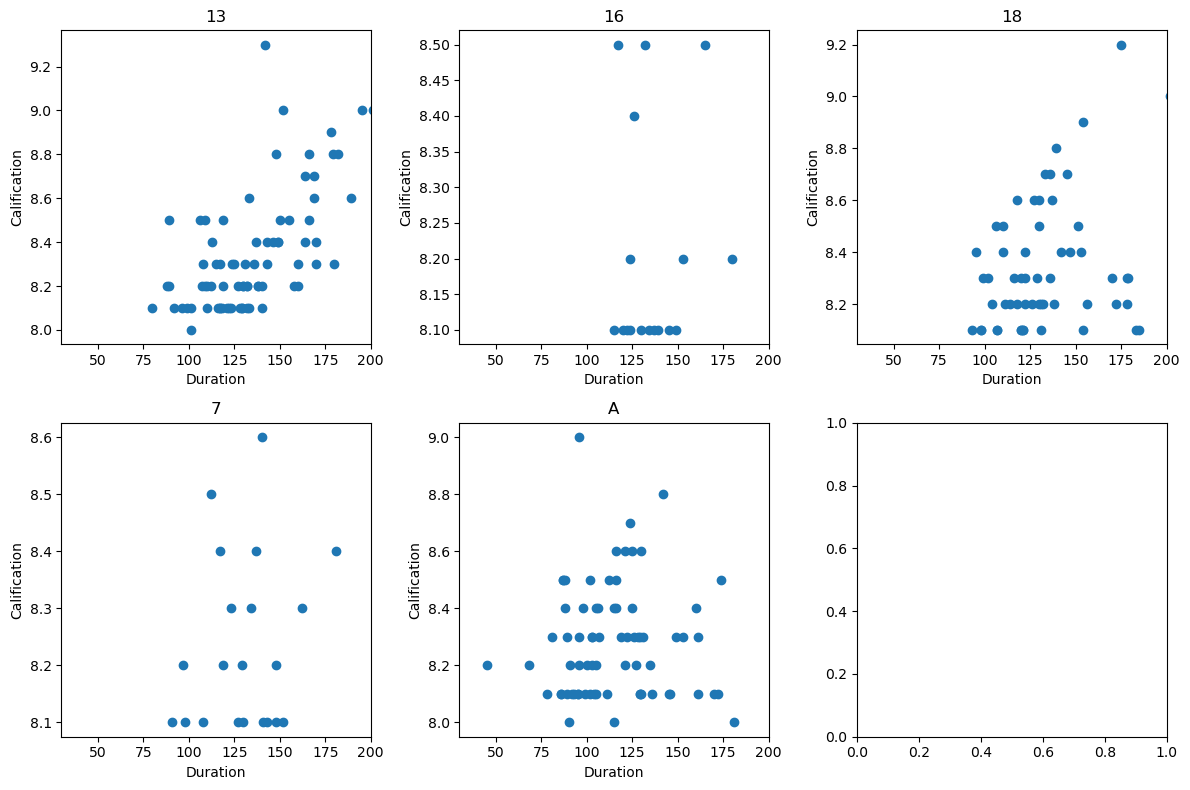

In [14]:
# Obtener todas las categorías únicas de "Rating"
categorias_rating = df_top25['Rating'].unique()

# Definir las dimensiones de la matriz de figuras
num_filas = 2  # Puedes ajustar el número de filas según la cantidad de categorías únicas
num_columnas = (len(categorias_rating) + 1) // num_filas  # Calcular el número de columnas necesarias

# Crear la figura y los ejes de la matriz
fig, axs = plt.subplots(num_filas, num_columnas, figsize=(12, 8))

# Iterar sobre cada categoría de Rating y generar el scatter plot correspondiente
for i, (rating, datos_rating) in enumerate(df_top25.groupby('Rating')):
    fila = i // num_columnas
    columna = i % num_columnas
    
    # Generar scatter plot en el eje correspondiente
    ax = axs[fila, columna] if num_filas > 1 else axs[columna]
    ax.scatter(datos_rating['Duration'], datos_rating['Calification'])
    
    # Configurar título y etiquetas de los ejes
    ax.set_title(rating)
    ax.set_xlabel('Duration')
    ax.set_ylabel('Calification')
    
    # Modificar la visualización del eje x
    ax.set_xlim(30, 200)

# Ajustar el diseño y mostrar la figura
plt.tight_layout()
plt.show()



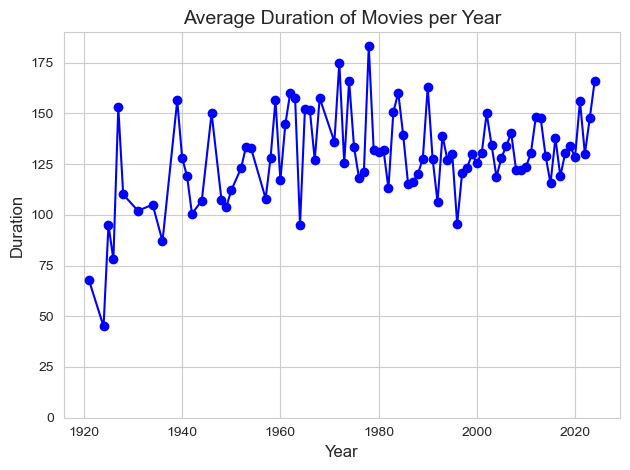

In [16]:
# Configurar el estilo
sns.set_style("whitegrid")

# Calcular la duración promedio de las películas por año y trazar un gráfico de línea
df_top25.groupby('Year')['Duration'].mean().plot(kind='line', linewidth=1.5, marker='o', color='b')

# Etiquetas y título
plt.xlabel('Year', fontsize=12)
plt.ylabel('Duration', fontsize=12)
plt.title('Average Duration of Movies per Year', fontsize=14)

# Ajustar el límite del eje y para alargarlo visualmente
plt.ylim(bottom=0)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

# 2. New Releases Visualization

In [18]:
# Concatenate df of new movies adding a column with the country
df_new_movies_ES['Country'] = 'ES'
df_new_movies_DE['Country'] = 'DE'
df_new_movies_IT['Country'] = 'IT'
df_new_movies_GB['Country'] = 'GB'
df_new_movies = pd.concat([df_new_movies_ES, df_new_movies_DE, df_new_movies_IT, df_new_movies_GB])


C:\Users\laura\AppData\Local\Temp\ipykernel_25032\2873919148.py:21: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


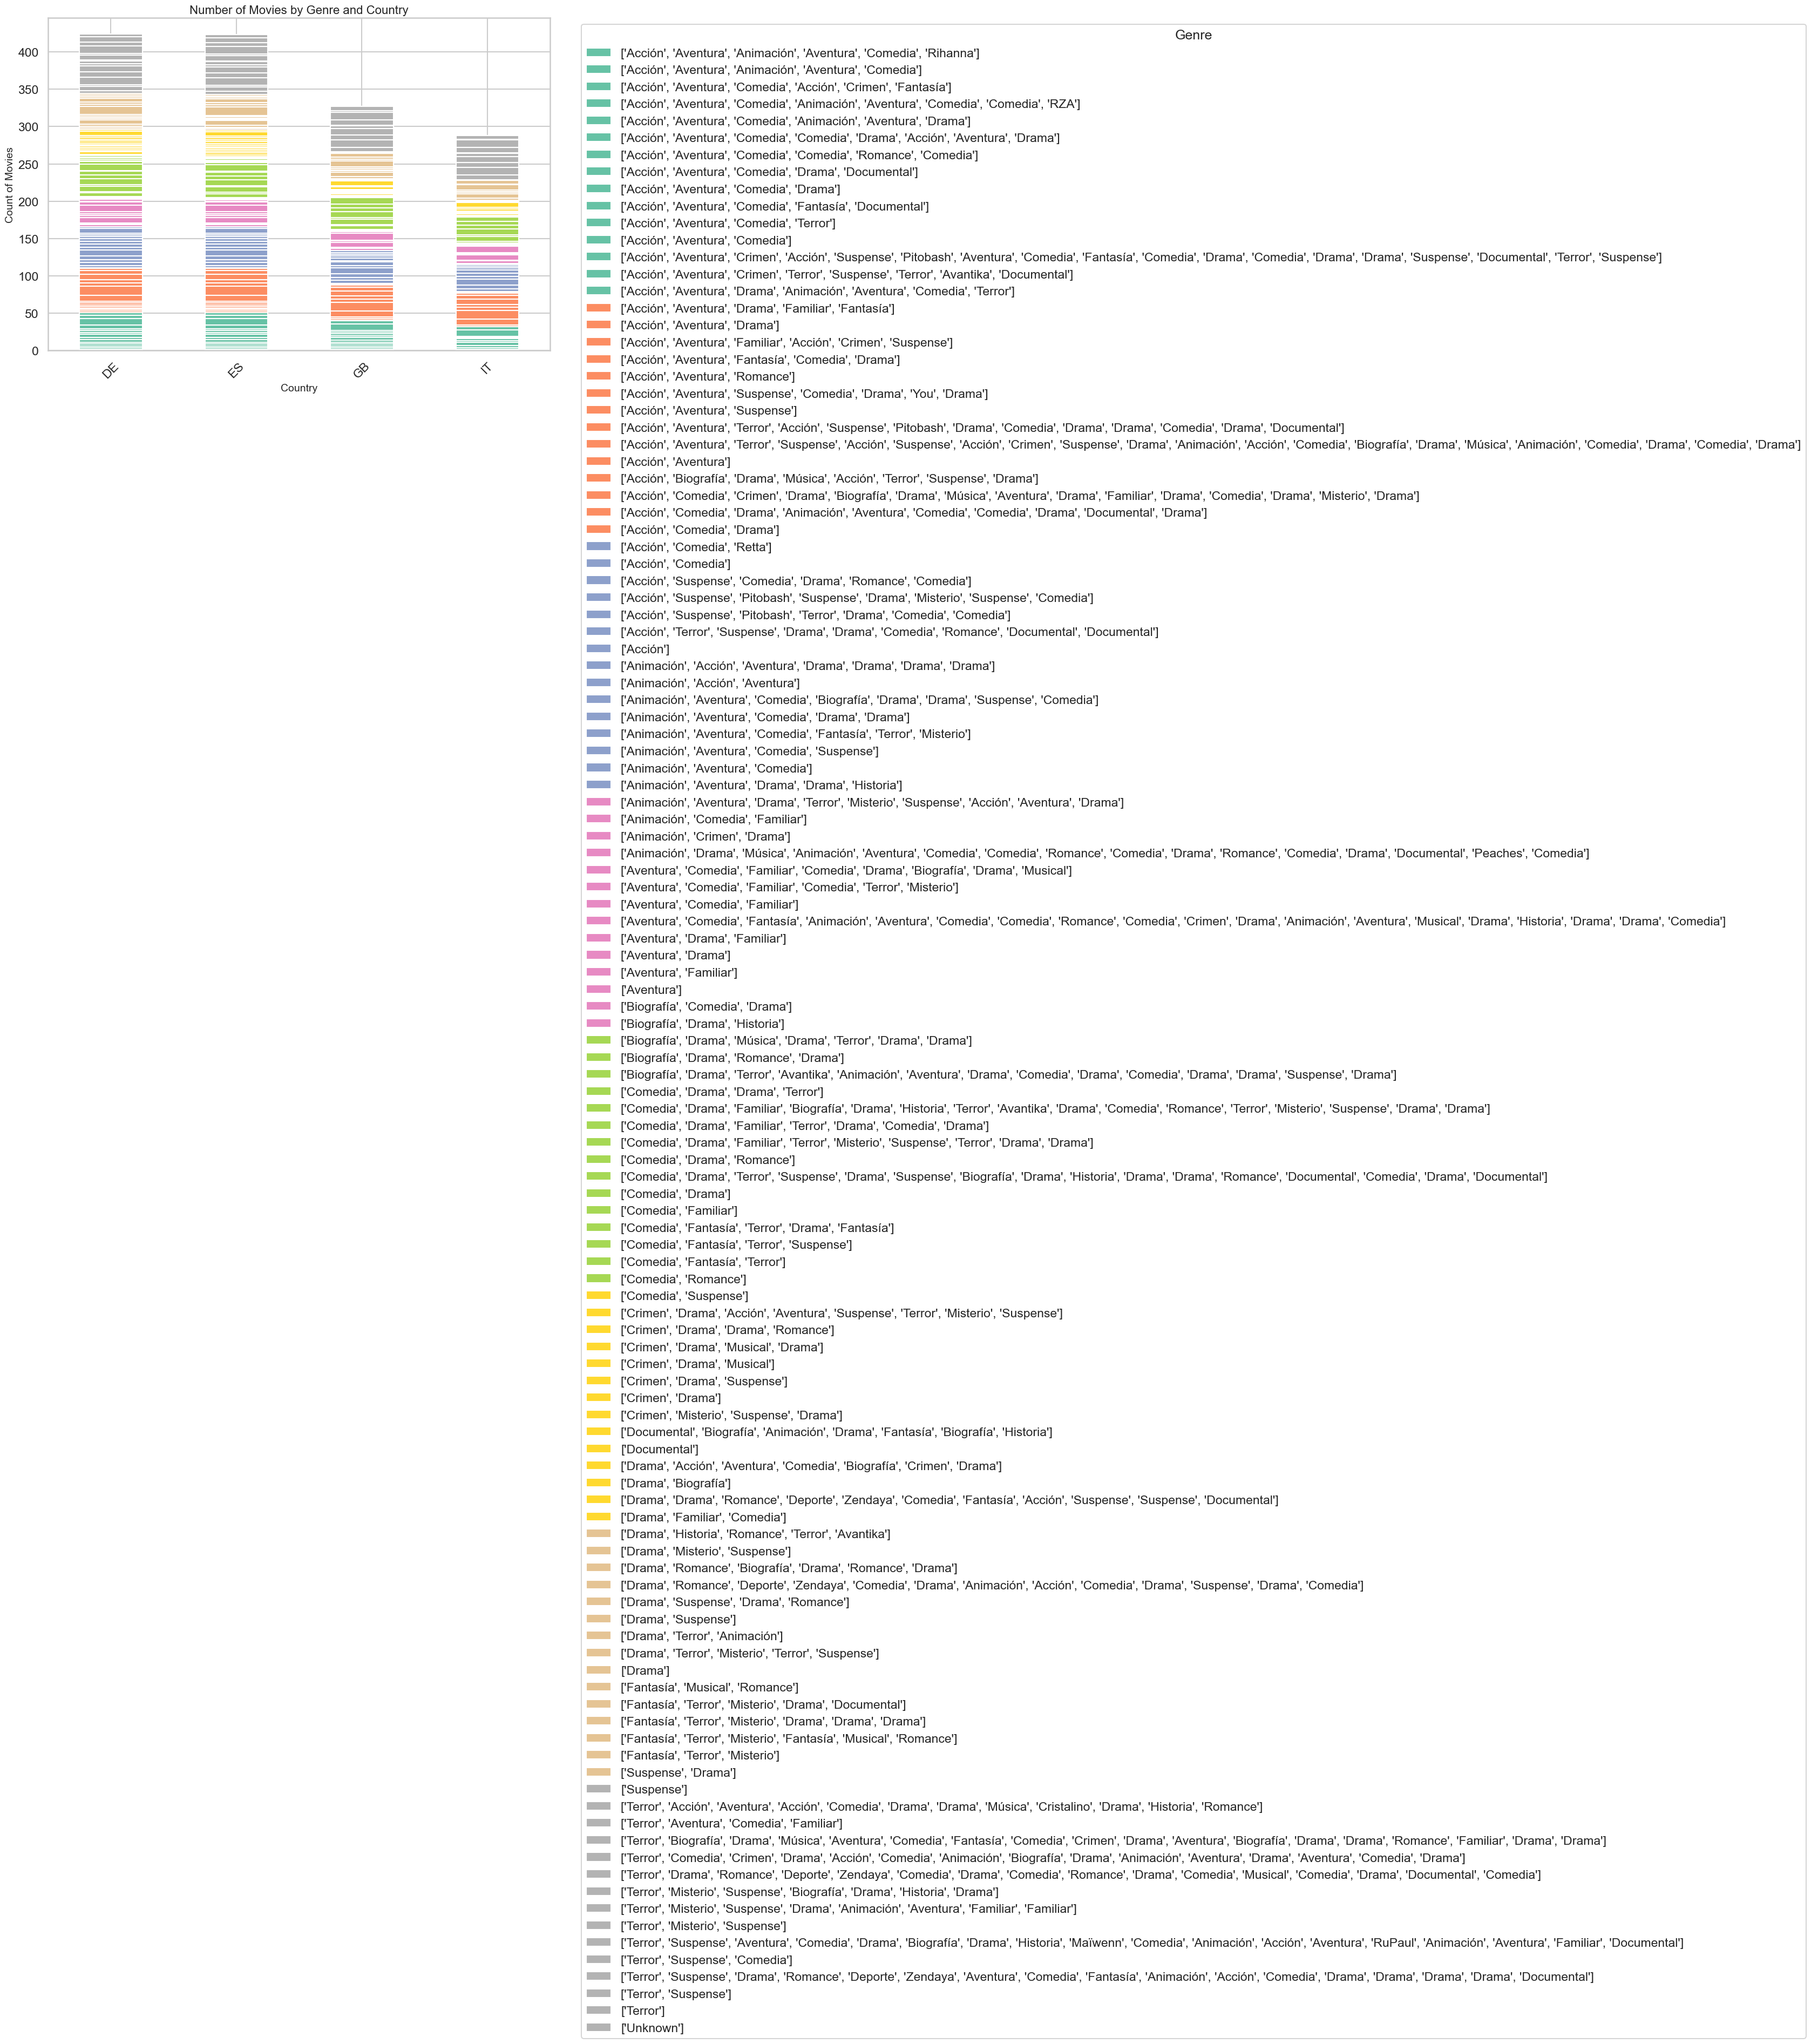

In [25]:
df_expanded = df_new_movies.drop('Genres', axis=1).join(
    df_new_movies['Genres'].str.split('|').explode()
).rename(columns={'Genres': 'Genre'})

# Agrupación por 'Country' y 'Genre', y contar las ocurrencias
genre_counts = df_expanded.groupby(['Country', 'Genre']).size().reset_index(name='Count')

# Pivotear para obtener un DataFrame adecuado para el gráfico de barras apiladas
pivot_genre_counts = genre_counts.pivot(index='Country', columns='Genre', values='Count').fillna(0)

# Dibujar el gráfico de barras apiladas
pivot_genre_counts.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='Set2')

# Ajustes finales para mejorar la presentación
plt.xlabel('Country', fontsize=14)
plt.ylabel('Count of Movies', fontsize=14)
plt.title('Number of Movies by Genre and Country', fontsize=16)
plt.xticks(rotation=45)
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

# 3. Accademy Awards Visualization

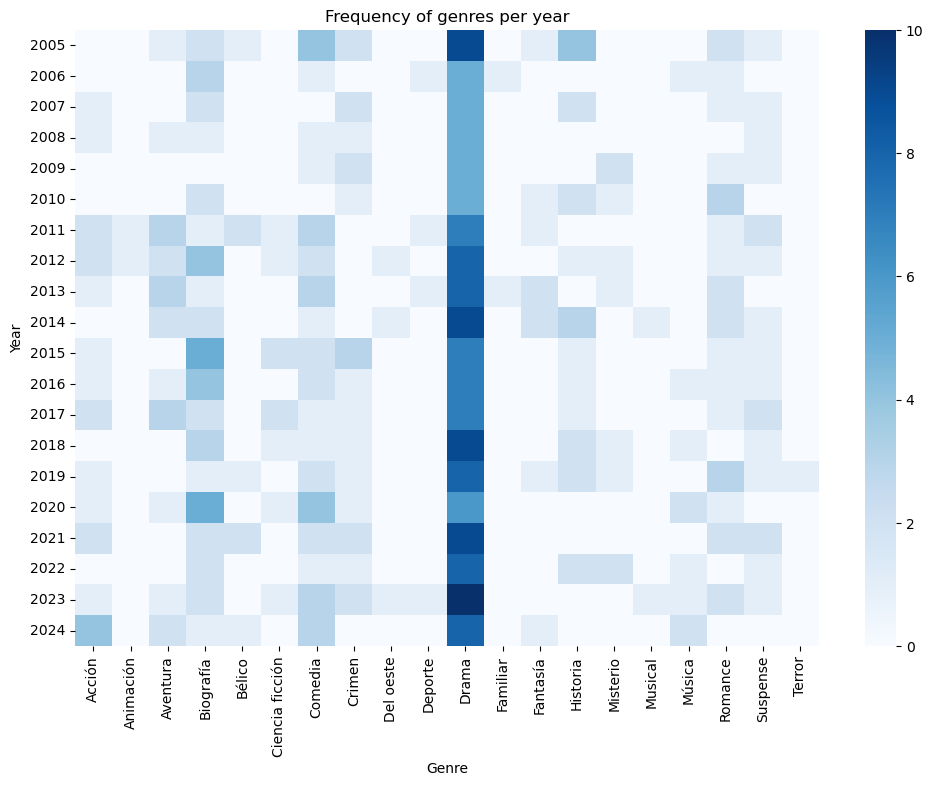

In [12]:
# Remove brackets and quotation marks from values in the 'Genre' column
df_awards['Genres'] = df_awards['Genres'].str.replace(r"[\[\]']", '', regex=True)

# Split column 'genres' into a list of genres
df_awards['Genres'] = df_awards['Genres'].apply(lambda x: x.split(','))

# Create a list of all unique genres
all_genres = list(set([genre.strip() for sublist in df_awards['Genres'] for genre in sublist]))

# Create an empty DataFrame with years as index and genders as columns
genre_year_counts = pd.DataFrame(index=df_awards['Year'].unique(), columns=all_genres).fillna(0)

# Fill in the DataFrame with the frequency of each genre per year
for idx, row in df_awards.iterrows():
    for genre in row['Genres']:
        genre_year_counts.loc[row['Year'], genre.strip()] += 1

# Sort the genres alphabetically
all_genres_sorted = sorted(all_genres)

# Reindex the DataFrame with the ordered genders
genre_year_counts = genre_year_counts.reindex(columns=all_genres_sorted)

# Heatmap creation
plt.figure(figsize=(12, 8))
sns.heatmap(genre_year_counts, cmap='Blues')
plt.title('Frequency of genres per year')
plt.xlabel('Genre')
plt.ylabel('Year')
plt.show()